In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
import numpy as np
#from sklearn.metrics import r2_score
# from sklearn.feature_selection import f_regression
# from sklearn.feature_selection import f_classif

In [35]:
all_feild = pd.read_csv('data/all_feild_clean.csv')
tag_df = pd.read_csv('data/genre_tag_clean.csv')

In [36]:
rating = all_feild['rating']
feature = tag_df.drop(columns= ['appid'])

In [37]:
y = rating
X = feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)

Feature 0: 0.000000
Feature 1: 0.013067
Feature 2: 0.004221
Feature 3: 0.004343
Feature 4: 0.011866
Feature 5: 0.002129
Feature 6: 0.010777
Feature 7: 0.005233
Feature 8: 0.006570
Feature 9: 0.002708
Feature 10: 0.000000
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.002297
Feature 14: 0.000244
Feature 15: 0.003530
Feature 16: 0.000811
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.004123
Feature 21: 0.002790
Feature 22: 0.002998
Feature 23: 0.001639
Feature 24: 0.000000
Feature 25: 0.000000
Feature 26: 0.020813
Feature 27: 0.000578
Feature 28: 0.004925
Feature 29: 0.001509
Feature 30: 0.003581
Feature 31: 0.003067
Feature 32: 0.008456
Feature 33: 0.005087
Feature 34: 0.000000
Feature 35: 0.000000
Feature 36: 0.006849
Feature 37: 0.000036
Feature 38: 0.000000
Feature 39: 0.000000
Feature 40: 0.005082
Feature 41: 0.000511
Feature 42: 0.000000
Feature 43: 0.000000
Feature 44: 0.002775
Feature 45: 0.001539
Feature 46: 0.001656
Feature 47: 0.001537
Fe

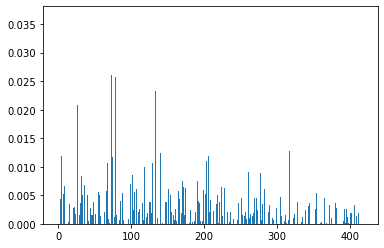

In [38]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func= mutual_info_regression, k= 'all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
 

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [6]:
X_train_fs.shape

(34277, 418)

In [15]:
# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred_lr = model.predict(X_test_fs)
# evaluate predictions
lr_mae = mean_absolute_error(y_test, y_pred_lr)



print(' LinearRegression: %.5f' % lr_mae)

 LinearRegression: 0.10421


All = 0.10053
300 = 0.10140
200 = 0.10132

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8)
dt.fit(X_train_fs, y_train)

# Predict
y_pred_dt = dt.predict(X_test_fs)

dt_mae = mean_absolute_error(y_test, y_pred_dt)

print(' DecisionTreeRegressor MAE: %.5f' % dt_mae)

 DecisionTreeRegressor MAE: 0.10607


In [42]:
from sklearn.svm import SVR

svr = SVR().fit(X_train_fs, y_train)

# Predict
y_pred_svr = svr.predict(X_test_fs)

svr_mae = mean_absolute_error(y_test, y_pred_svr)

print(' SVR MAE: %.5f' % svr_mae)

 SVR MAE: 0.10090


In [19]:
from sklearn import linear_model

lassoReg = linear_model.Lasso(alpha=0.1)
lassoReg.fit(X_train_fs, y_train)

# Predict
y_pred_lasso = lassoReg.predict(X_test_fs)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

print(' Lasso MAE: %.5f' % lasso_mae)

 Lasso MAE: 0.11517


In [7]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=20)
rfr.fit(X_train_fs, y_train)

y_pred_rfr = rfr.predict(X_test_fs)

rfr_mae = mean_absolute_error(y_test, y_pred_rfr)

print(' RandomForestRegressor MAE: %.5f' % rfr_mae)

 RandomForestRegressor MAE: 0.10047


{'whiskers': [<matplotlib.lines.Line2D at 0x2520dabfa20>,
 'caps': [<matplotlib.lines.Line2D at 0x2520dacc160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2520dabf710>,
 'medians': [<matplotlib.lines.Line2D at 0x2520dacc860>,
 'fliers': [<matplotlib.lines.Line2D at 0x2520daccf28>,
 'means': [<matplotlib.lines.Line2D at 0x2520daccbe0>,
  <matplotlib.lines.Line2D at 0x2520db16da0>]}

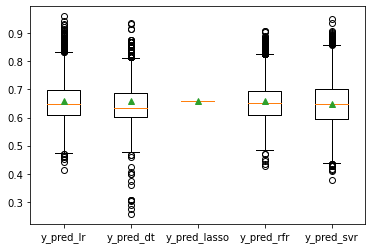

In [46]:
pyplot.boxplot([y_pred_lr, y_pred_dt, y_pred_lasso, y_pred_rfr, y_pred_svr],labels= ['y_pred_lr', 'y_pred_dt', 'y_pred_lasso', 'y_pred_rfr', 'y_pred_svr'], showmeans=True)

In [49]:
print('LR %.5f' % lr_mae)
print('DT %.5f' %  dt_mae)
print('lasso %.5f' %  lasso_mae)
print('rfr %.5f' %  rfr_mae)
print('svr %.5f' %  svr_mae)

LR 0.10214
DT 0.10607
lasso 0.11517
rfr 0.10042
svr 0.10090


In [8]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [50, 100, 150, 200 ]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60,70]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [9]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_fs, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [10]:
rf_random.best_params_

{'n_estimators': 150,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [11]:
rf_random.best_score_ 

0.22875111458898048

In [39]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('MAE: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

base_model = RandomForestRegressor(n_estimators = 150, random_state = 42, min_samples_split = 2, min_samples_leaf=2, max_features='sqrt', bootstrap= False)
base_model.fit(X_train_fs, y_train)
base_accuracy = evaluate(base_model, X_test_fs, y_test)

Model Performance
MAE: 0.0984
Accuracy = 82.71%.


all > 0.10214 \
100 > 0.10382 \
200 > 0.10304 \
300 > 0.10256 \
400 > 0.10220

## Model Deployment

In [40]:
ohe_feild = pd.read_csv('data/genre_tag_clean.csv')
ohe_feild = ohe_feild.drop(columns= ['appid'])
len(ohe_feild.keys())

418

In [41]:
tags = [['a','b','c'], ['d','e','f']]
def deploy(tags):
    ohe_feild = pd.read_csv('data/genre_tag_clean.csv')
    ohe_feild = ohe_feild.drop(columns= ['appid'])
    df = np.zeros((len(tags), len(ohe_feild.keys())))
    for row in range(len(tags)):
        index_list = []
        for tag in tags[row]:
            index = ohe_feild.keys().to_list().index(tag)
            index_list.append(index)

        for i in index_list:
            df[row][i] = 1
        
    rating = base_model.predict(df)
    return rating




In [58]:
rules = pd.read_csv('rules.csv')
union = rules['union']

features =  []
for str_tag in union:
    features.append(str_tag.split(', '))

ratings = deploy(features)

In [60]:
d = {'Tags': union, 'Rating' : ratings}
fin = pd.DataFrame(data=d)
fin.to_csv('final_pred_minsub0.1_112rec.csv')

# Done

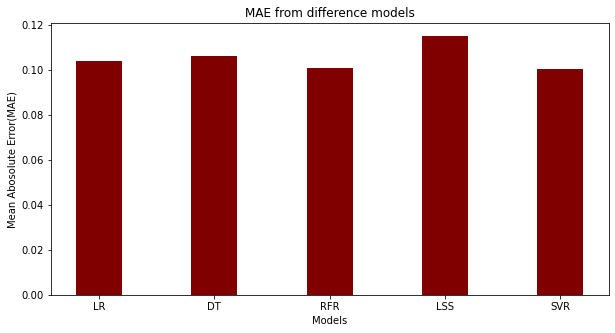

In [61]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

courses = ['LR', 'DT', 'RFR', 'LSS', 'SVR']
values = [0.10421, 0.10607, 0.10090, 0.11517, 0.10047]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Models")
plt.ylabel("Mean Abosolute Error(MAE)")
plt.title("MAE from difference models")
plt.show()